###Part 1 Importing the Data
This section includes an import from kaggle and only needs to be run the first time.  After the import, I save the data in a new dataframe called songdata.csv

In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
import os

In [3]:
#download latest version
path = kagglehub.dataset_download("undefinenull/million-song-dataset-spotify-lastfm")

In [4]:
#set the file path to the Music Info.csv file within the downloaded dataset
csv_file_path = os.path.join(path, 'Music Info.csv')

#load the csv file into a Pandas DataFrame
music_info_df = pd.read_csv(csv_file_path)

#display the DataFrame
display(music_info_df.head())

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


###Part 2 Data Cleansing and NaNs
In this section, I review the data from Kaggle and clean up any NaNs

In [5]:
#values in the genre column
print(music_info_df['genre'].unique())

[nan 'RnB' 'Rock' 'Pop' 'Metal' 'Electronic' 'Jazz' 'Punk' 'Country'
 'Folk' 'Reggae' 'Rap' 'Blues' 'New Age' 'Latin' 'World']


In [6]:
#nans in the genre column
print(music_info_df['genre'].isna().sum())

28335


In [7]:
#what are the values for the tags feature
print(music_info_df['tags'].unique())

['rock, alternative, indie, alternative_rock, indie_rock, 00s'
 'rock, alternative, indie, pop, alternative_rock, british, 90s, love, britpop'
 'rock, alternative, alternative_rock, 90s, grunge' ...
 'rock, instrumental, japanese' 'electronic, indie_pop, love'
 'rock, alternative_rock, japanese, cover']


In [8]:
#Nans in the dataframe
print(music_info_df.isna().sum())

track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64


In [9]:
#what are the tags distribution
print(music_info_df['tags'].value_counts())

tags
country                                     506
reggae                                      454
black_metal                                 442
rap, hip_hop                                378
drum_and_bass                               365
                                           ... 
indie, british, acoustic, beautiful, 00s      1
rock, psychedelic, 60s                        1
jazz, oldies, mellow                          1
female_vocalists, chillout                    1
pop, female_vocalists, 70s, oldies            1
Name: count, Length: 20057, dtype: int64


In [10]:
#drop Nans from the genre column
music_info_df = music_info_df.dropna(subset=['genre'])
music_info_df = music_info_df.dropna(subset=['tags'])
music_info_df=music_info_df.reset_index(drop=True)

#check Nans again
print(music_info_df.isna().sum())

track_id               0
name                   0
artist                 0
spotify_preview_url    0
spotify_id             0
tags                   0
genre                  0
year                   0
duration_ms            0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
dtype: int64


In [11]:
#drop columns i no longer need including track_id, name, artist, spotify_preview_url, spotify_id
music_info_df = music_info_df.drop(columns=['track_id', 'name', 'artist', 'spotify_preview_url',
                                            'spotify_id'])

In [12]:
#create a new dataframe called songdata
songdata = music_info_df


In [13]:
#save a local copy of songdata
songdata.to_csv('songdata.csv', index=False)


In [14]:
#what are the column types
print(songdata.dtypes)

tags                 object
genre                object
year                  int64
duration_ms           int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object


###Part 3 Data Analysis and Visualization
In this section I review data types, visualize data for better understanding.  I import all libraries again so i can start here for future reviews.

In [1]:
#reload all libraries
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#reload of the  dataframe
import pandas as pd
songdata=pd.read_csv('songdata.csv')


##This is the result of a complete iteration of CRISP-DM pointing me back to the original features to include others I didn't originally consider

In [3]:
#convert the tags column to multiple binary columns
tags_dummies = songdata['tags'].str.get_dummies(sep=', ')

#display the first few rows of the new dataframe
display(tags_dummies.head())

#concatenate this with original dataframe
songdata_all = pd.concat([songdata.drop(columns=['tags']), tags_dummies], axis=1)
display(songdata_all.head())

,00s,60s,70s,80s,90s,acoustic,alternative,alternative_rock,ambient,american,...,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
0,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,...,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
0,RnB,1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,...,0,0,0,0,0,0,0,0,0,0
1,RnB,2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,...,0,0,0,0,0,0,0,0,0,0
2,Rock,2007,311014,0.566,0.429,5,-7.826,1,0.0242,0.715000,...,0,0,0,0,0,0,0,0,0,0
3,Pop,2003,265506,0.554,0.490,4,-8.046,1,0.0457,0.016800,...,0,0,0,0,0,0,0,0,0,0
4,RnB,2010,223106,0.809,0.720,6,-7.776,1,0.1360,0.033700,...,0,0,0,0,0,0,0,0,0,1


In [4]:
#names of columns in df
print(songdata_all.columns.tolist())

['genre', 'year', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', '00s', '60s', '70s', '80s', '90s', 'acoustic', 'alternative', 'alternative_rock', 'ambient', 'american', 'avant_garde', 'beautiful', 'black_metal', 'blues', 'blues_rock', 'british', 'britpop', 'chill', 'chillout', 'classic_rock', 'classical', 'country', 'cover', 'dance', 'dark_ambient', 'death_metal', 'doom_metal', 'downtempo', 'drum_and_bass', 'electro', 'electronic', 'emo', 'experimental', 'female_vocalists', 'folk', 'french', 'funk', 'german', 'gothic', 'gothic_metal', 'grindcore', 'grunge', 'guitar', 'hard_rock', 'hardcore', 'heavy_metal', 'hip_hop', 'house', 'idm', 'indie', 'indie_pop', 'indie_rock', 'industrial', 'instrumental', 'j_pop', 'japanese', 'jazz', 'lounge', 'love', 'male_vocalists', 'mellow', 'melodic_death_metal', 'metal', 'metalcore', 'new_age', 'new_wave', 'noise', 'nu_metal', 'oldie

In [5]:
#how many postive values do I have for each column in the dataframe
print(songdata.sum())


tags                rock, alternative, alternative_rock, 90s, grun...
genre               RnBRnBRockPopRnBMetalElectronicJazzPunkPopRock...
year                                                         43910128
duration_ms                                                5514274883
danceability                                               10865.0396
energy                                                   15264.546037
key                                                            115899
loudness                                                  -178536.711
mode                                                            13988
speechiness                                                 1676.7364
acousticness                                              4282.493742
instrumentalness                                          4968.407244
liveness                                                    4742.4604
valence                                                    9608.58074
tempo               

In [6]:
#show songdata datatypes
print(songdata.dtypes)

tags                 object
genre                object
year                  int64
duration_ms           int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object


In [7]:
#create X and y with X only focused on characteristics of the song
X=songdata.drop(columns=['genre', 'tags'])
y=songdata['genre']

In [8]:
#create X_all to include tags and other features
X_all=songdata_all.drop(columns=['genre'])


In [9]:
#apply standardscaler to X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
#apply standardscaler to X_all
scaler = StandardScaler()
X_all = scaler.fit_transform(X_all)

In [11]:
#format y data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
songdata['genre_encoded'] = y

In [12]:
#add the encoded genre column to songdata_all using the existing y
songdata_all['genre_encoded'] = pd.Series(y, index=songdata_all.index)

#display the head of songdata_all to verify the new column
display(songdata_all.head())

,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,...,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop,genre_encoded
0,RnB,1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,...,0,0,0,0,0,0,0,0,0,12
1,RnB,2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,...,0,0,0,0,0,0,0,0,0,12
2,Rock,2007,311014,0.566,0.429,5,-7.826,1,0.0242,0.715000,...,0,0,0,0,0,0,0,0,0,13
3,Pop,2003,265506,0.554,0.490,4,-8.046,1,0.0457,0.016800,...,0,0,0,0,0,0,0,0,0,8
4,RnB,2010,223106,0.809,0.720,6,-7.776,1,0.1360,0.033700,...,0,0,0,0,0,0,0,0,1,12


##Part 3A Visualizing the Data

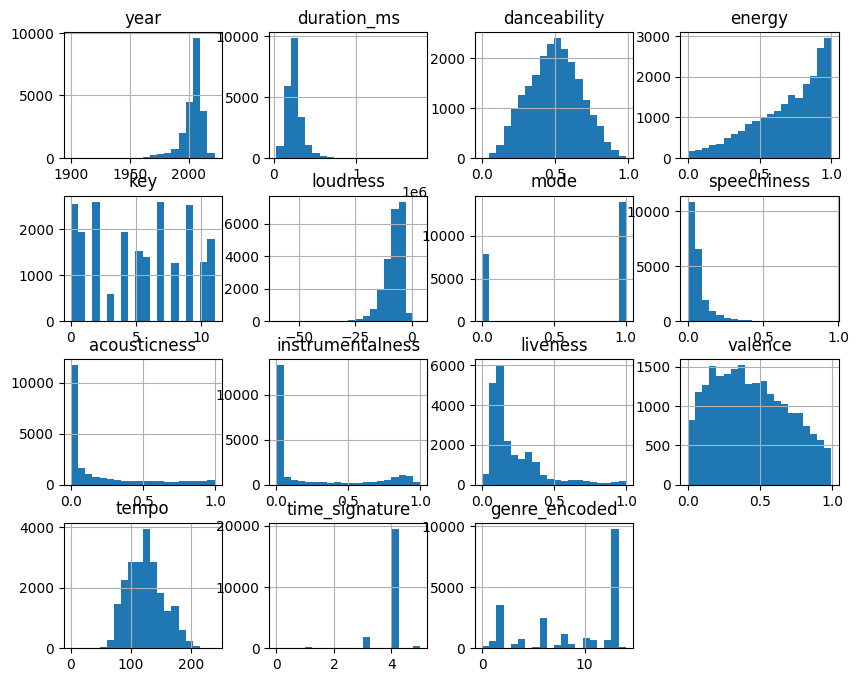

In [ ]:
#histogram for features that are numeric
songdata.hist(bins=20, figsize=(10, 8))
plt.show()

In [ ]:
#create a DataFrame from the scaled data
X_df = pd.DataFrame(X)

#add the original genre column to the new DataFrame
X_df['genre'] = songdata['genre']

#display the first few rows of the new DataFrame
display(X_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,genre
0,-1.469507,-0.315548,0.069384,0.536099,-0.360871,0.537530,-1.328299,-0.462858,-0.682213,-0.670165,-0.700696,0.409687,-0.142449,0.236811,RnB
1,0.518702,-0.125193,0.109059,-1.103277,0.479453,-0.406794,0.752842,-0.502161,-0.647182,-0.671107,-0.476199,-1.310201,-1.089931,0.236811,RnB
2,0.401749,0.573423,0.398121,-1.107417,-0.080763,0.072873,0.752842,-0.663178,1.815678,-0.671482,-0.525240,-1.039877,0.743887,0.236811,Rock
3,-0.066065,0.134141,0.330107,-0.854887,-0.360871,0.022837,0.752842,-0.390591,-0.624119,-0.669943,-0.438056,0.292155,-1.344400,0.236811,Pop
4,0.752609,-0.275141,1.775416,0.097276,0.199345,0.084245,0.752842,0.754275,-0.565063,-0.667348,3.321727,1.541914,0.481245,0.236811,RnB


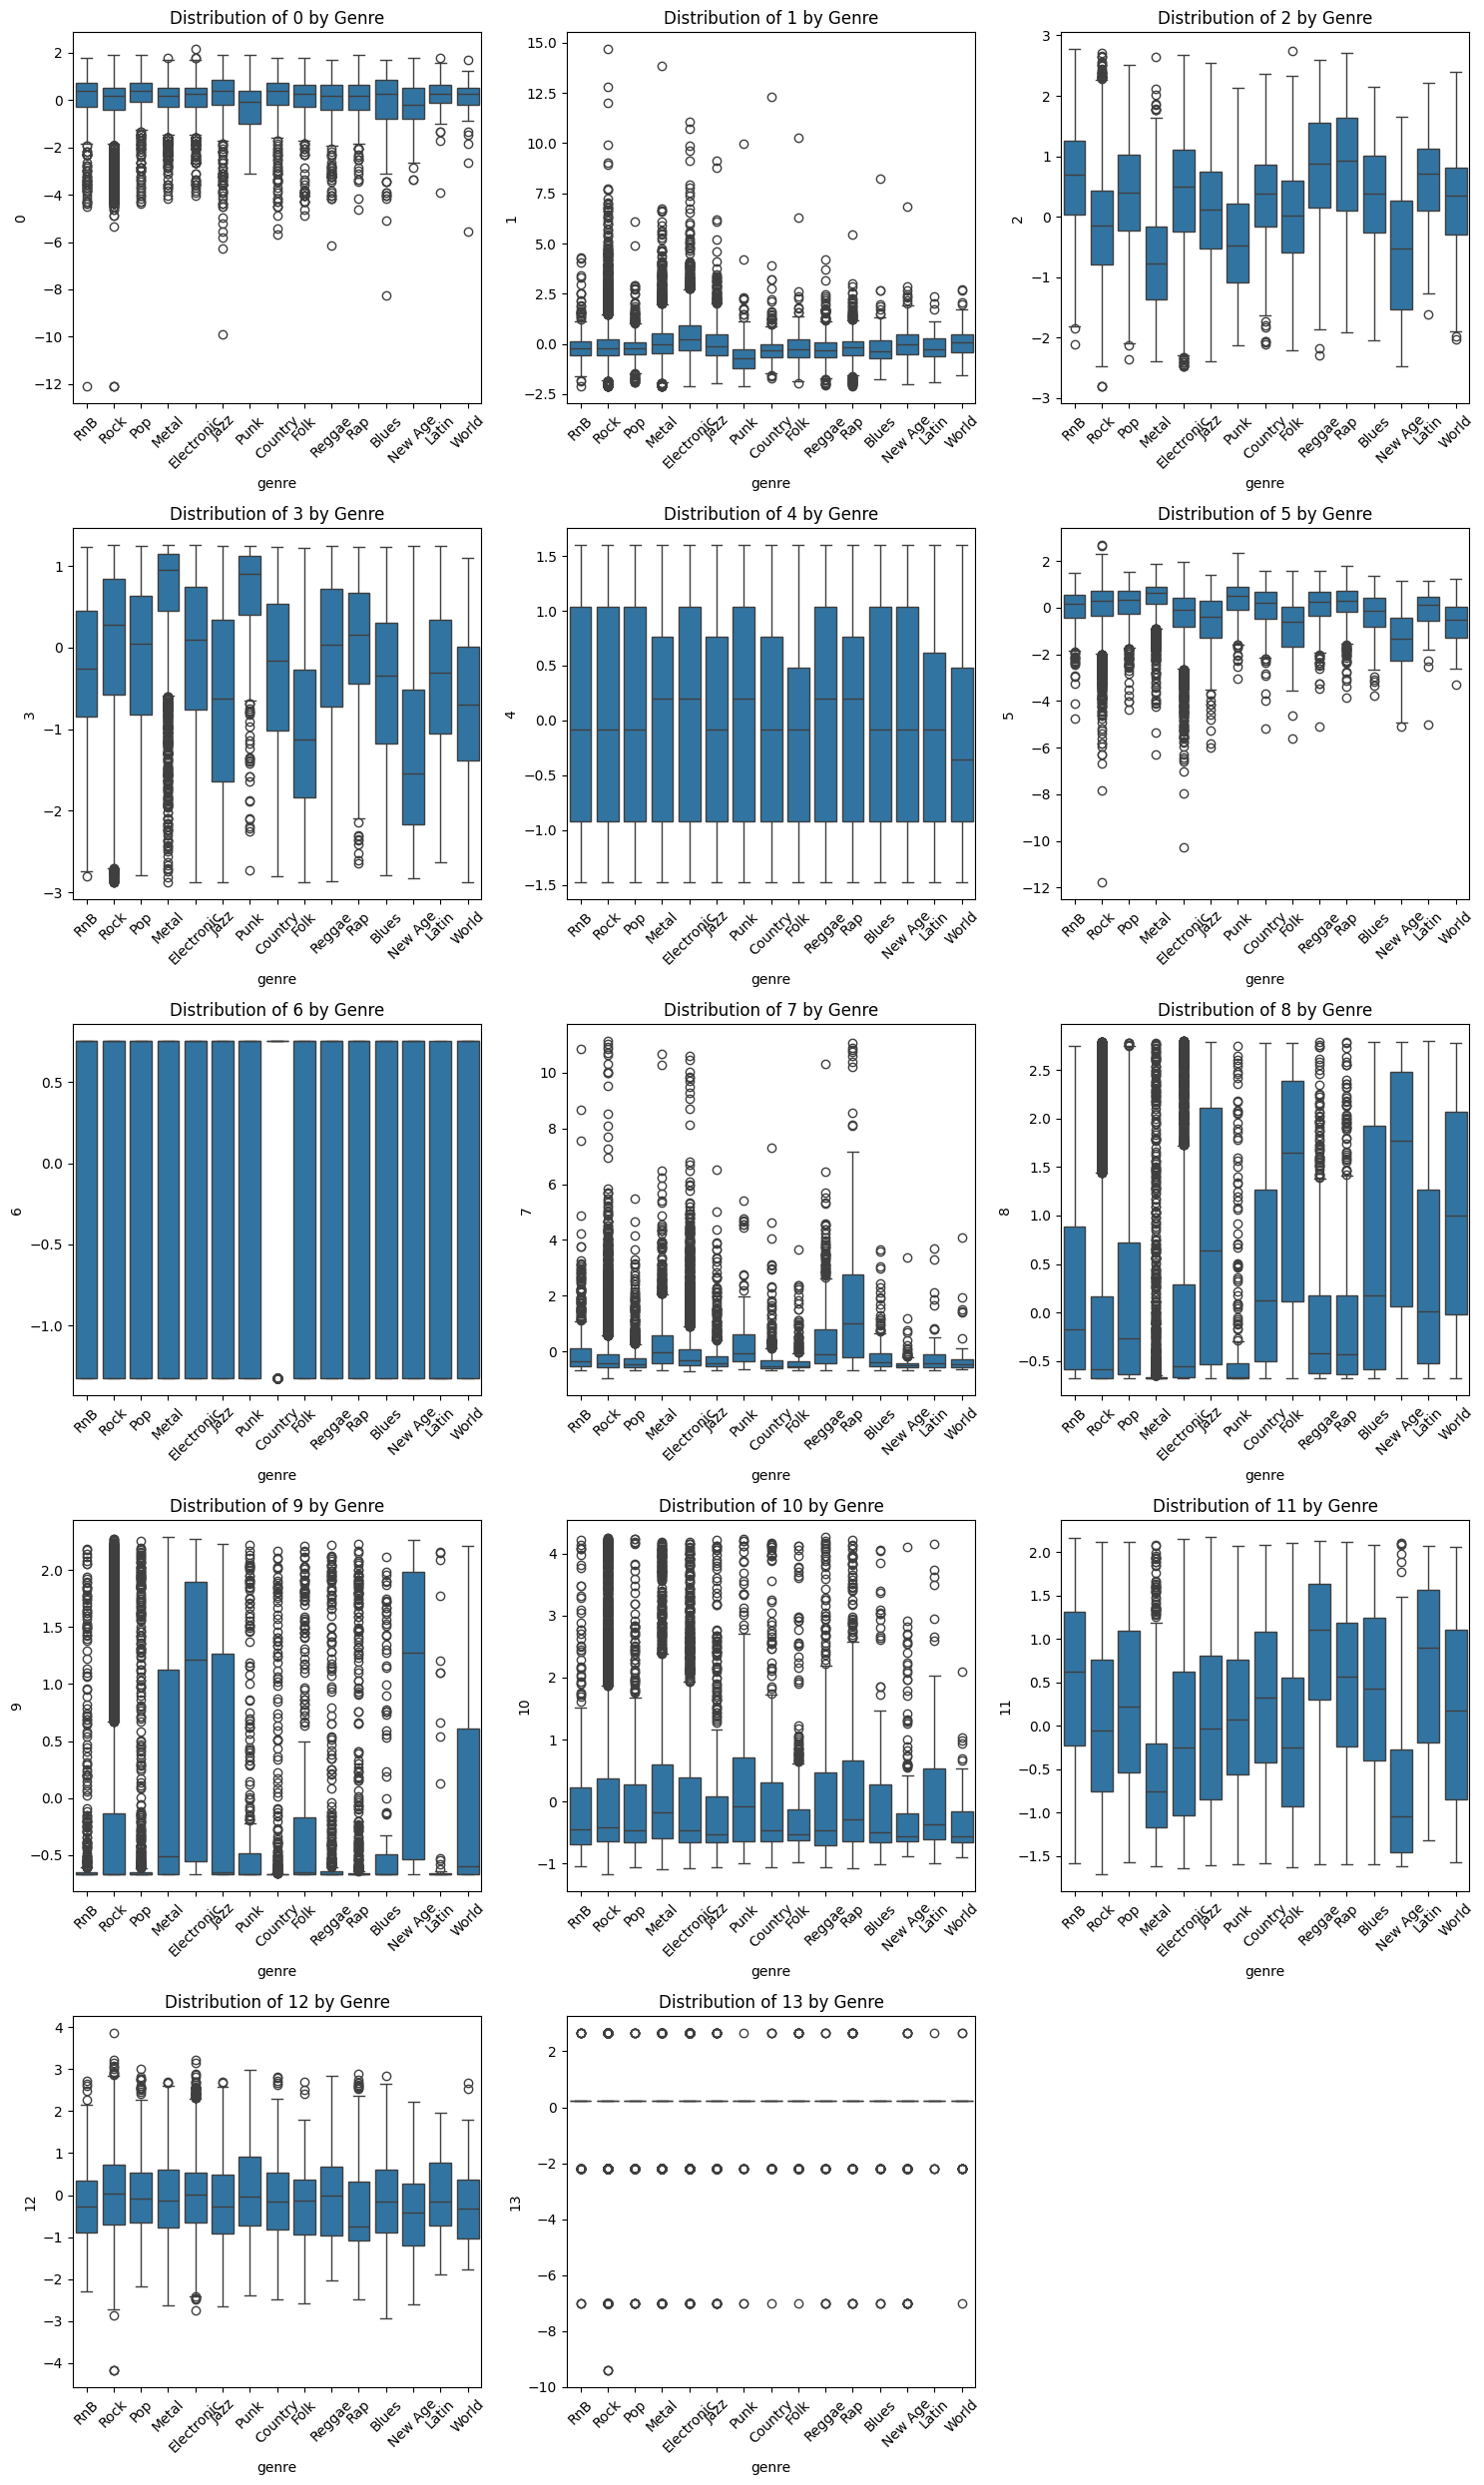

In [ ]:
#iterate and plot feature distributions per genre
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn

#get the list of feature columns
feature_columns = X_df.columns.drop('genre')

#determine the number of rows and columns for the subplots
n_features = len(feature_columns)
n_cols = 3  # You can adjust the number of columns as needed
n_rows = (n_features + n_cols - 1) // n_cols

#create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

#iterate through each feature and create a box plot
for i, col in enumerate(feature_columns):
    sns.boxplot(x='genre', y=col, data=X_df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Genre')
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability

#hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###Part 4 Feature Engineering

In [ ]:
#calculate the correlation of each feature with the target variable y
#convert y to a pandas Series to use with corrwith
y_series = pd.Series(y)

#get the names of the numerical columns that were likely used to create X
numerical_cols_for_X = songdata.select_dtypes(include=np.number).columns.tolist()
# Remove 'year' and 'genre_encoded'
if 'year' in numerical_cols_for_X:
    numerical_cols_for_X.remove('year')
if 'genre_encoded' in numerical_cols_for_X:
    numerical_cols_for_X.remove('genre_encoded')


#create a DataFrame from X using the identified column names
if len(numerical_cols_for_X) != X.shape[1]:
    all_numerical_cols = songdata.select_dtypes(include=np.number).columns.tolist()
    if 'genre_encoded' in all_numerical_cols:
        all_numerical_cols.remove('genre_encoded')
    feature_column_names = all_numerical_cols[:X.shape[1]]
else:
    feature_column_names = numerical_cols_for_X


X_df = pd.DataFrame(X, columns=feature_column_names)

X_df.index = y_series.index

feature_correlation_with_y = X_df.corrwith(y_series)

#display the correlation of each feature with y
print("Correlation of features with genre_encoded:")

#sort the absolute value highest to lowest
feature_correlation_with_y = feature_correlation_with_y.abs().sort_values(ascending=False)
print(feature_correlation_with_y)

Correlation of features with genre_encoded:
instrumentalness    0.269725
loudness            0.138843
duration_ms         0.127678
valence             0.098733
danceability        0.097004
acousticness        0.085451
energy              0.063302
mode                0.061356
year                0.057659
speechiness         0.036797
tempo               0.031346
key                 0.011273
time_signature      0.003986
liveness            0.000572
dtype: float64


Based on this information, the most important features to include are Instrumentalness, loudness, duration.  I can also include valence and danceability

In [ ]:
#correlation of y with X_all features
#get the column names from songdata_all excluding the 'genre' and 'genre_encoded' columns
X_all_column_names = songdata_all.drop(columns=['genre', 'genre_encoded']).columns

#create a DataFrame from X_all using the correct column names
X_all_df = pd.DataFrame(X_all, columns=X_all_column_names)

y_series = pd.Series(y, index=X_all_df.index)

feature_correlation_with_y = X_all_df.corrwith(y_series)

#display the correlation of each feature with y
print("Correlation of features with genre_encoded:")

#sort the absolute value highest to lowest
feature_correlation_with_y = feature_correlation_with_y.abs().sort_values(ascending=False)
print(feature_correlation_with_y)

Correlation of features with genre_encoded:
electronic          0.361869
rock                0.356932
indie               0.284216
instrumentalness    0.269725
alternative         0.261615
                      ...   
hardcore            0.003481
russian             0.002409
gothic              0.001169
german              0.001025
liveness            0.000572
Length: 114, dtype: float64


##Part 4a Polynomial features
In this section polynomials of the most important features are added to see if it improves correlation with the genre.  As you will see, polynomial features did not improve correlation.

In [ ]:
#correlation between polynomials for instrumentalness, loudness, duration, valence and danceability with genre encoded
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


In [ ]:
#create and add columns to songdata of these polynomial features
numerical_cols_for_poly = ['year', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                           'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                           'time_signature']

#get the names of the polynomial features generated by poly
poly_features = poly.get_feature_names_out(input_features=numerical_cols_for_poly)


#ensure the number of polynomial features matches the number of columns in X_poly
if len(poly_features) != X_poly.shape[1]:
    print(f"Warning: Number of generated polynomial feature names ({len(poly_features)}) does not match the number of columns in X_poly ({X_poly.shape[1]}). Proceeding, but results may be unexpected.")

#create a DataFrame from X_poly with the generated features
X_poly_df = pd.DataFrame(X_poly, columns=poly_features)

#select the original columns from songdata that were not used to create polynomial features
#these are the non-numerical columns tags, genre, genre_encoded
original_cols_to_keep = ['tags', 'genre']

#concatenate the relevant original columns, the polynomial features, and the target variable
songdata = pd.concat([songdata[original_cols_to_keep], X_poly_df, songdata['genre_encoded']], axis=1)

#display the head of the modified songdata DataFrame to verify
display(songdata.head())

,tags,genre,1,year,duration_ms,danceability,energy,key,loudness,mode,...,valence^2 tempo,valence^2 time_signature,valence tempo^2,valence tempo time_signature,valence time_signature^2,tempo^3,tempo^2 time_signature,tempo time_signature^2,time_signature^3,genre_encoded
0,"rock, alternative, alternative_rock, 90s, grunge",RnB,1.0,-1.469507,-0.315548,0.069384,0.536099,-0.360871,0.537530,-1.328299,...,-0.023909,0.039747,0.008313,-0.013820,0.022975,-0.002891,0.004805,-0.007988,0.01328,12
1,"rock, alternative, indie, alternative_rock, in...",RnB,1.0,0.518702,-0.125193,0.109059,-1.103277,0.479453,-0.406794,0.752842,...,-1.871005,0.406516,-1.556453,0.338173,-0.073475,-1.294783,0.281319,-0.061123,0.01328,12
2,"rock, alternative, indie, pop, alternative_roc...",Rock,1.0,0.401749,0.573423,0.398121,-1.107417,-0.080763,0.072873,0.752842,...,0.804398,0.256074,-0.575434,-0.183185,-0.058316,0.411643,0.131043,0.041717,0.01328,13
3,"rock, alternative, alternative_rock, 90s, funk",Pop,1.0,-0.066065,0.134141,0.330107,-0.854887,-0.360871,0.022837,0.752842,...,-0.114751,0.020213,0.528044,-0.093013,0.016384,-2.429884,0.428014,-0.075393,0.01328,8
4,"rock, electronic, alternative, indie, pop, alt...",RnB,1.0,0.752609,-0.275141,1.775416,0.097276,0.199345,0.084245,0.752842,...,1.144160,0.563018,0.357103,0.175723,0.086470,0.111455,0.054845,0.026988,0.01328,12


In [ ]:
#create a temporary DataFrame for correlation from X_poly_df and y, ensuring index alignment

#ensure error suppression, drop the constant term '1' from X_poly_df if it exists
X_poly_df_no_constant = X_poly_df.drop(columns=['1'], errors='ignore')
poly_features_and_target_df = X_poly_df_no_constant.copy()
poly_features_and_target_df['genre_encoded'] = pd.Series(y, index=poly_features_and_target_df.index)

#calculate the correlation of polynomial features with y
polynomial_correlation_with_y = poly_features_and_target_df.corr()['genre_encoded'].drop('genre_encoded', errors='ignore')

#display the correlation of polynomial features with y
print("Correlation of polynomial features with genre_encoded:")
print(polynomial_correlation_with_y)

Correlation of polynomial features with genre_encoded:
year                       -0.057659
duration_ms                -0.127678
danceability               -0.097004
energy                      0.063302
key                        -0.011273
                              ...   
valence time_signature^2    0.020176
tempo^3                     0.026640
tempo^2 time_signature     -0.006612
tempo time_signature^2      0.000628
time_signature^3            0.011721
Name: genre_encoded, Length: 679, dtype: float64


In [ ]:
#sort correlations from highest to lowest
polynomial_correlation_with_y.sort_values(ascending=True)

#show only correlations with y
polynomial_correlation_with_y[polynomial_correlation_with_y != 1.0]

,genre_encoded
year,-0.057659
duration_ms,-0.127678
danceability,-0.097004
energy,0.063302
key,-0.011273
...,...
valence time_signature^2,0.020176
tempo^3,0.026640
tempo^2 time_signature,-0.006612
tempo time_signature^2,0.000628


In [ ]:
#sort by the absolute value
polynomial_correlation_with_y.abs().sort_values(ascending=False)

,genre_encoded
instrumentalness,0.269725
instrumentalness^3,0.255021
mode^2 instrumentalness,0.248583
instrumentalness^2,0.247739
key^2 instrumentalness,0.219678
...,...
key^2 liveness,0.000254
loudness speechiness tempo,0.000189
key liveness valence,0.000161
speechiness^2 acousticness,0.000150


In [ ]:
#display correlations for instrumentalness, loudness and duration and for the squared and 3 polynomial factors
selected_features = ['instrumentalness', 'instrumentalness^2', 'instrumentalness^3',
                     'loudness', 'loudness^2', 'loudness^3',
                     'duration_ms', 'duration_ms^2', 'duration_ms^3']

print(polynomial_correlation_with_y[selected_features])

instrumentalness     -0.269725
instrumentalness^2   -0.247739
instrumentalness^3   -0.255021
loudness              0.138843
loudness^2           -0.079648
loudness^3            0.053234
duration_ms          -0.127678
duration_ms^2        -0.043094
duration_ms^3        -0.017469
Name: genre_encoded, dtype: float64


##Part 5: Prepare a Baseline Model


In [13]:
#create training and test data set for song specific features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#create training and test data set for all features including tags
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

##Part 5a: Setting a baseline
Below we create two baseline models one with DummyClassifier identifying the most frequent genre and the second using linear regression on all features

In [30]:
#create baseline model to beat using 5 features
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)


0.44867700729927007

In [ ]:
#create baseline to beat using all features
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train_all, y_train_all)
dummy_clf.score(X_test_all, y_test_all)

0.44867700729927007

Since DummyClassifier is based on the most frequent class from y_train, it doesn't make sense to fit it with different featured datasets.  The result will always be based on y which is the same in all cases

In [31]:
#logistic regression with three features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5266879562043796


In [32]:
#logistic regression with all features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train_all, y_train)
y_pred = logreg.predict(X_test_all)
accuracy = accuracy_score(y_test_all, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7358576642335767


##Part 5b PCA Components
This section applies PCA to the largest set of features that include all tags

In [ ]:
#create a dataset using PCA to run through models
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


pca=PCA(n_components=0.95)
pca.fit(X_train_all)
X_train_pca=pca.transform(X_train_all)
X_test_pca=pca.transform(X_test_all)
print(pca.explained_variance_ratio_)

[0.04173132 0.03734525 0.0291178  0.02768897 0.02396207 0.02237756
 0.02013918 0.01862769 0.01841627 0.0175213  0.01656888 0.01598292
 0.01546636 0.01514579 0.01426438 0.01338367 0.01292356 0.01259844
 0.01223476 0.01217441 0.01203886 0.01118883 0.01095052 0.01070175
 0.01064925 0.01048637 0.01040138 0.01025093 0.01007439 0.00997226
 0.0097804  0.00969811 0.00949611 0.0094136  0.00916508 0.00911397
 0.00902579 0.00897745 0.00875692 0.00866362 0.00862589 0.00851726
 0.00840888 0.00835322 0.00823858 0.00817526 0.00807456 0.00799617
 0.00790489 0.00781624 0.00775051 0.00763339 0.00753288 0.00739817
 0.00733054 0.00726243 0.00718601 0.00709719 0.00700072 0.00691138
 0.00684898 0.00670099 0.00661782 0.00658394 0.0064691  0.00631627
 0.0062905  0.00622193 0.00611763 0.00600369 0.00600055 0.00576512
 0.00572908 0.00567638 0.00560953 0.00549394 0.00533797 0.00528872
 0.00517732 0.00512738 0.00508712 0.00499003 0.00495838 0.00492673
 0.00478565 0.00468142 0.00463734 0.00448521 0.00436391 0.0043

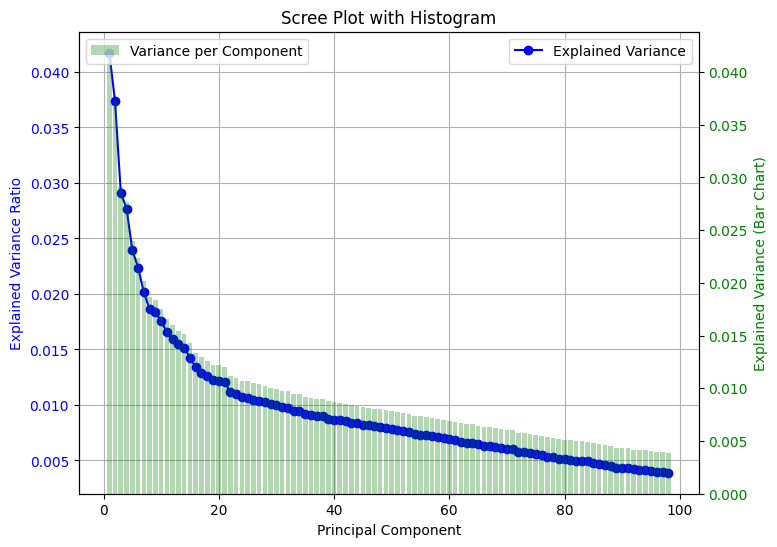

In [ ]:
#create variance visualization
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(components, explained_variance, marker='o', linestyle='-', color='b', label="Explained Variance")
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title("Scree Plot with Histogram")
ax1.grid(True)

#second y-axis for Histogram
ax2 = ax1.twinx()
ax2.bar(components, explained_variance, alpha=0.3, color='g', label="Variance per Component")
ax2.set_ylabel("Explained Variance (Bar Chart)", color='g')
ax2.tick_params(axis='y', labelcolor='g')

#create legend
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

plt.show()

In [ ]:
#check variable weights
print(pca.components_)

[[ 8.94840839e-03 -6.05749146e-02 -1.03254598e-01 ...  9.61096242e-02
  -3.77798404e-02 -1.72584640e-01]
 [-2.80282607e-02 -1.10116060e-01  4.26772177e-02 ... -1.01795910e-01
  -7.61753661e-02 -9.34236794e-02]
 [ 8.02873162e-02 -7.19874286e-02  3.42929477e-01 ... -9.06806524e-02
   6.05601219e-02  1.04606253e-01]
 ...
 [ 4.32231151e-02 -2.62839637e-04 -3.04666408e-02 ...  7.03761320e-02
  -3.86348092e-02 -8.16397502e-02]
 [-3.21208782e-02 -9.09551275e-02 -8.39102637e-03 ...  8.65693344e-03
  -4.43125124e-02 -4.58569857e-02]
 [ 1.05042536e-02 -6.21145304e-02 -9.36500392e-02 ... -1.94945283e-02
  -1.81985080e-02 -2.50428856e-02]]


In [ ]:
#use DummyClassifier with PCA
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_pca, y_train)
dummy_clf.score(X_test_pca, y_test)


0.44867700729927007

In [ ]:
#use LogisticRegression with PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
y_pred = logreg.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7296989051094891


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#LogisticRegression performed best using all of the features rather than a subset of features

In [33]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


###Part 6 Improve the Model
This section will focus on identifying the best model and model parameters for the data.  Since X includes only numeric data, the models will include LinearRegression, KNNNeighbors, DecisionTree and SVC. The Accuracy score to beat is 52.4%

In [15]:
#set up logistic regression and other models for analysis based on the data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'poly', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]})
}

In [ ]:
#create the pipeline for models identified above
#conduct a gridsearch for each model, fit the data to the model, capture time, and provide
#metrics for results and parameters in a table

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import time

results = []
for name, (model, params) in models.items():
    pipeline = Pipeline([
        (name, model)
    ])

    #perform gridsearch
    start_time = time.time()
    grid_search = GridSearchCV(pipeline, params, cv=6)
    #fit the grid search with the larger dataset
    grid_search.fit(X_train_all, y_train_all)
    #recalculate fit_time based on new grid search results
    fit_time = (time.time() - start_time) / grid_search.n_splits_

    #get best model
    best_model = grid_search.best_estimator_

    #evaluate model on training and test sets
    #use best_model
    train_score = best_model.score(X_train_all, y_train_all)
    test_score = best_model.score(X_test_all, y_test_all)
    best_params = grid_search.best_params_

    #append results in a dataframe
    results.append([name, train_score, test_score, fit_time, best_params])

In [ ]:
#create results dataframe
results_df = pd.DataFrame(results, columns=['name', 'train score', 'test score', 'average fit time', 'best_params'])
results_df.set_index('name', inplace=True)
results_df.sort_values(by='test score', ascending=False, inplace=True)
results_df

,train score,test score,average fit time,best_params
name,,,,
svc,0.783539,0.751141,745.983955,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
logisticregression,0.743326,0.735630,55.213901,{'logisticregression__C': 0.1}
knn,0.755818,0.723312,0.379783,{'knn__n_neighbors': 7}
decisiontreeclassifier,0.795802,0.670620,0.782172,{'decisiontreeclassifier__max_depth': 15}


In [35]:
#use svc model with svc_C=1, svc_kernel= 'rbf'
from sklearn.svm import SVC
best_model = SVC(C=1, kernel='rbf')
best_model.fit(X_train_all, y_train_all)
y_pred = best_model.predict(X_test_all)

In [36]:
#accuracy of svc model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7511405109489051


###Part 7 Apply Ensemble Techniques to Improve the Models
Ensemble techniques are first applied to the smaller set of song features as well as to the models for the larger set of features (Songdata_all)

In [37]:
#create a bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
bagging_clf = BaggingClassifier(estimator=best_model, n_estimators=10, random_state=42, bootstrap=False)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5342153284671532


In [38]:
#try bagging with Decisiontreeclassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

best_model = DecisionTreeClassifier(max_depth=5)
bagging_clf = BaggingClassifier(estimator=best_model, n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5301094890510949


In [39]:
#best parameters for n_estimators
n_trees = [1500, 2000, 2250]
oob_scores = []
for n in n_trees:
    model = BaggingClassifier(estimator=best_model, n_estimators=n, random_state=42, oob_score=True).fit(X_train, y_train)
    oob_scores.append(model.oob_score_)
    pass

### ANSWER CHECK
print(oob_scores)

[0.5234998859228839, 0.5238421172712754, 0.5236139630390144]


In [40]:
#apply RandomForestClassifier to the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5472171532846716


In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_trees = [1500, 2000, 2250]
oob_scores = []
for n in n_trees:
    model = RandomForestClassifier(n_estimators=n, random_state=42, oob_score=True).fit(X_train, y_train)
    oob_scores.append(model.oob_score_)
    pass
print(oob_scores)

In [42]:
from sklearn.ensemble import RandomForestClassifier
depths = [9, 10, 11, 12, 15, None]
oob_scores = []
for d in depths:
    model = RandomForestClassifier(random_state=42, oob_score=True, max_depth=d).fit(X_train, y_train)
    oob_scores.append(model.oob_score_)
    pass

print(oob_scores)

[0.5375884097650011, 0.5411248003650467, 0.5427218799908738, 0.5439196897102441, 0.5451174994296144, 0.5435774583618526]


In [ ]:
#RandomClassifier with max_depth=15J and n_estimators = 2000
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(n_estimators=2000, random_state=42, max_depth=15)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


##Section 7b Applying Ensemble to X_all data


In [ ]:
bagging_clf = BaggingClassifier(estimator=best_model, n_estimators=10, random_state=42, bootstrap=False)
bagging_clf.fit(X_train_all, y_train_all)
y_pred = bagging_clf.predict(X_test_all)
accuracy = accuracy_score(y_test_all, y_pred)
print("Accuracy:", accuracy)

In [45]:
#try bagging with Decisiontreeclassifier

best_model = DecisionTreeClassifier(max_depth=5)
bagging_clf = BaggingClassifier(estimator=best_model, n_estimators=10, random_state=42)
bagging_clf.fit(X_train_all, y_train_all)
y_pred = bagging_clf.predict(X_test_all)
accuracy = accuracy_score(y_test_all, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5834854014598541


In [ ]:
#best parameters for n_estimators
n_trees = [1500, 2000, 2250]
oob_scores = []
for n in n_trees:
    model = BaggingClassifier(estimator=best_model, n_estimators=n, random_state=42, oob_score=True).fit(X_train_all, y_train_all)
    oob_scores.append(model.oob_score_)
    pass

### ANSWER CHECK
print(oob_scores)

In [47]:
depths = [9, 10, 11, 12, 15, None]
oob_scores = []
for d in depths:
    model = RandomForestClassifier(random_state=42, oob_score=True, max_depth=d).fit(X_train_all, y_train_all)
    oob_scores.append(model.oob_score_)
    pass

### ANSWER CHECK
print(oob_scores)
#15 is the best depth

[0.632785763175907, 0.6509240246406571, 0.6619895049053159, 0.6735112936344969, 0.7014031485284052, 0.74435318275154]


In [ ]:
#RandomClassifier with max_depth=15 and n_estimators = 1500
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(n_estimators=1500, random_state=42, max_depth=15)
rf_clf.fit(X_train_all, y_train_all)
y_pred = rf_clf.predict(X_test_all)
accuracy = accuracy_score(y_test_all, y_pred)
print("Accuracy:", accuracy)

In this section, the model is improved using neural networks


In [ ]:
#load neural network libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
#use a neural network to improve the model
model = Sequential()
#model.add(Dense(128, input_dim=X_train_all.shape[1], activation='relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y_train_all)), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#train model on training data
y_train_all_encoded = to_categorical(y_train_all)
model.fit(X_train_all, y_train_all_encoded, epochs=10, batch_size=32, validation_split=0.2)


In [52]:
#print accuracy when applying test data
y_test_all_encoded = to_categorical(y_test_all)
loss, accuracy = model.evaluate(X_test_all, y_test_all_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7270 - loss: 1.1373
Test Loss: 1.100817084312439
Test Accuracy: 0.7406477928161621


##Using the Genre Predictor
This section takes the Nan rows and populates them with the predictions from the Genre predictor model

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

In [4]:
#reload data
path = kagglehub.dataset_download("undefinenull/million-song-dataset-spotify-lastfm")
csv_file_path = os.path.join(path, 'Music Info.csv')

#reload the CSV file into a Pandas DataFrame
music_info_df = pd.read_csv(csv_file_path)

#load songdata.csv to get songdata and songdata_all
songdata = pd.read_csv('songdata.csv')

In [5]:
#transform the data
#convert the tags column to multiple binary columns
tags_dummies = songdata['tags'].str.get_dummies(sep=', ')

#concatenate this with original dataframe
songdata_all = pd.concat([songdata.drop(columns=['tags']), tags_dummies], axis=1)

#prepare data for training the model
X_all = songdata_all.drop(columns=['genre'])
y = songdata_all['genre']

#apply standardscaler to X_all
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

#encode y data
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [6]:
#re-create training and test data set for all features including tags
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_scaled, y_encoded, test_size=0.2, random_state=42)

In [7]:
#train the best model (SVC with C=1, kernel='rbf')
best_model = SVC(C=1, kernel='rbf')
best_model.fit(X_train_all, y_train_all)

SVC(C=1)

In [8]:
#use best_model to predict y for music_info_df
#drop non-numeric columns
music_info_df_nan_processed = music_info_df[music_info_df['genre'].isna()].drop(columns=['genre', 'track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id'], errors='ignore')

#apply get_dummies to the tags column
music_info_df_nan_processed = pd.get_dummies(music_info_df_nan_processed, columns=['tags'])

#align columns with the training data (X_train_all)
#get the column names from the DataFrame used for training (X_all before scaling)
training_columns = songdata_all.drop(columns=['genre']).columns

#reindex music_info_df_nan_processed to match training_columns and fill missing values with 0
music_info_df_nan_aligned = music_info_df_nan_processed.reindex(columns=training_columns, fill_value=0)

#scale the data for prediction
music_info_df_nan_aligned_scaled = scaler.transform(music_info_df_nan_aligned)

#make predictions using the best model
y_pred_encoded = best_model.predict(music_info_df_nan_aligned_scaled)


In [9]:
#inverse transform predictions back to original genre labels
y_pred = le.inverse_transform(y_pred_encoded)

#add the predicted genres back to the original dataframe
#get the indices of the rows where genre was NaN
nan_indices = music_info_df[music_info_df['genre'].isna()].index

#assign the predicted values to the 'genre' column at these indices
if len(y_pred) == len(nan_indices):
    music_info_df.loc[nan_indices, 'genre'] = y_pred
else:
    print("Warning: The number of predictions does not match the number of NaN values.")

#display the updated DataFrame head to show the filled-in genres
display(music_info_df.head())

#check if there are any remaining NaNs in the genre column
print("\nRemaining NaNs in 'genre' column:", music_info_df['genre'].isna().sum())

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",Rock,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",Rock,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",Rock,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4



Remaining NaNs in 'genre' column: 0
